# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [11]:
#NAME: Justin Garzione
#NETID: justing6
import cv2
import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# File storage location including utils.py
datadir = "/Users/justingarzione/Documents/CompPhoto/JUSTING6_proj1/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils
import matplotlib.pyplot as plt

In [12]:
#Import main files for Hybrid Images Main Submission
im1_file = datadir + 'LaurenPicture.jpg'
im2_file = datadir + 'JustinPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

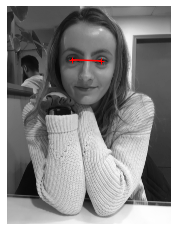

In [13]:
#Mark Eye Areas for proper alignment of Images
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[1200, 990], [1730, 1010]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

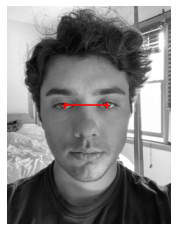

In [14]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[800,1400], [1400,1400]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [15]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [16]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

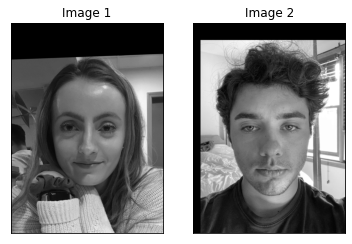

In [17]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [18]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here 
    #Low-pass kernel with lower sigma value
    ksize1 = np.int(np.ceil(sigma_low)*6+1)
    fil = cv2.getGaussianKernel(ksize1, sigma_low) # 1D kernel
    fil = fil*np.transpose(fil) # 2D kernel by outer product
    im1 = cv2.filter2D(im1, -1, fil)
    
    #High-pass kernel with higher sigma, accentuating the high frequency
    #information
    ksize = np.int(np.ceil(sigma_high)*6+1)
    fil1 = cv2.getGaussianKernel(ksize, sigma_high) # 1D kernel
    fil1 = fil1*np.transpose(fil1) # 2D kernel by outer product
    im2 = im2 - (cv2.filter2D(im2, -1, fil1))
    
    fig, axes = plt.subplots(1, 2)
    axes[1].imshow(im1,cmap='gray')
    axes[1].set_title('Filter Image 2'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[0].imshow(im2,cmap='gray')
    axes[0].set_title('Filter Image 1'), axes[1].set_xticks([]), axes[1].set_yticks([]);
    
    combined = (im1 + im2) /2
    return (combined, im1, im2)



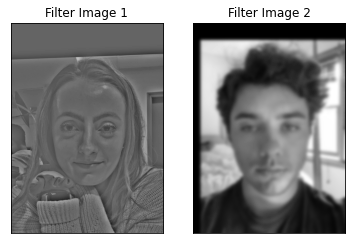

In [19]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 60

im_hybrid, im1filter, im2filter = hybridImage(im2, im1, sigma_low, sigma_high)

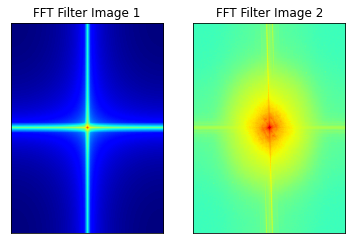

In [20]:
#Plot FFT of Filtered Images
fig, axes = plt.subplots(1, 2)
axes[0].set_xticks([]) 
axes[0].set_yticks([])
axes[1].set_xticks([]) 
axes[1].set_yticks([])
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im1filter)))
axes[0].set_title('FFT Filter Image 1')
axes[0].imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im2filter)))
axes[1].set_title('FFT Filter Image 2')
axes[1].imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

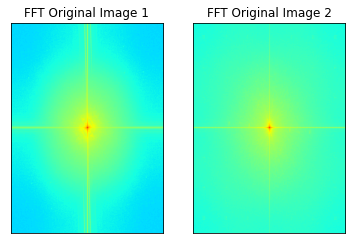

In [21]:
#Plot FFT of Filtered Images
fig, axes = plt.subplots(1, 2)
axes[0].set_xticks([]) 
axes[0].set_yticks([])
axes[1].set_xticks([]) 
axes[1].set_yticks([])
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im1)))
axes[0].set_title('FFT Original Image 1')
axes[0].imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im2)))
axes[1].set_title('FFT Original Image 2')
axes[1].imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

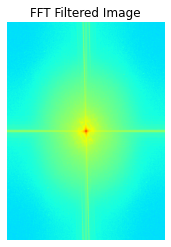

In [22]:
#Plot with FFT of the Hybrid Image
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))
plt.axis('off')
plt.title('FFT Filtered Image')
plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

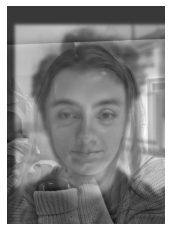

In [23]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
#Resulting Hybrid Image
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

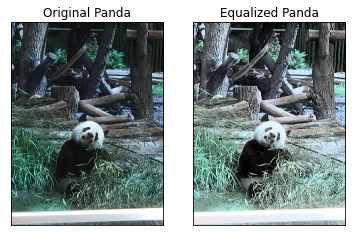

In [24]:
im3_file = datadir + 'BerlinPandaPicture.jpg'
#im3 = np.float32(cv2.imread(im3_file)/255)
im3 = cv2.imread(im3_file)
im3a = cv2.imread(im3_file)
im3_ycrcb = cv2.cvtColor(im3, cv2.COLOR_BGR2YCR_CB)
channels = cv2.split(im3_ycrcb)

# equalize the histogram of the Y channel
cv2.equalizeHist(channels[0],channels[0])
cv2.merge(channels,im3_ycrcb)
cv2.cvtColor(im3_ycrcb,cv2.COLOR_YCR_CB2BGR,im3)
im3 = np.clip(im3, a_min = 0 , a_max = 255)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im3a)
axes[0].set_title('Original Panda'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im3)
axes[1].set_title('Equalized Panda'), axes[1].set_xticks([]), axes[1].set_yticks([]);

#### Color enhancement 

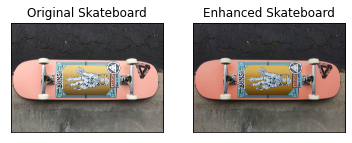

In [25]:
im4_file = datadir + 'SkateboardPicture.jpg'
im4_0 = cv2.imread(im4_file)
im4_1 = cv2.cvtColor(im4_0,cv2.COLOR_BGR2RGB)
im4_1 = cv2.cvtColor(im4_0,cv2.COLOR_RGB2BGR)
hsv_im4 = cv2.cvtColor(im4_0,cv2.COLOR_BGR2HSV)

#multiply by a factor to change the saturation
hsv_im4[...,1] = hsv_im4[...,1]*1.4

#multiply by a factor of less than 1 to reduce the brightness 
hsv_im4[...,2] = hsv_im4[...,2]*.9

#function that maps the brightness values to all be higher
#without breaking 255 bound
hsv_im4 = np.clip(hsv_im4, a_min = 0, a_max = 255)

im4_enhanced=cv2.cvtColor(hsv_im4,cv2.COLOR_HSV2RGB)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(im4_1)
axes[0].set_title('Original Skateboard'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im4_enhanced)
axes[1].set_title('Enhanced Skateboard'), axes[1].set_xticks([]), axes[1].set_yticks([]);

#### Color shift

Text(0.5, 1.0, 'Less Yellow (Lightspeed Musk)')

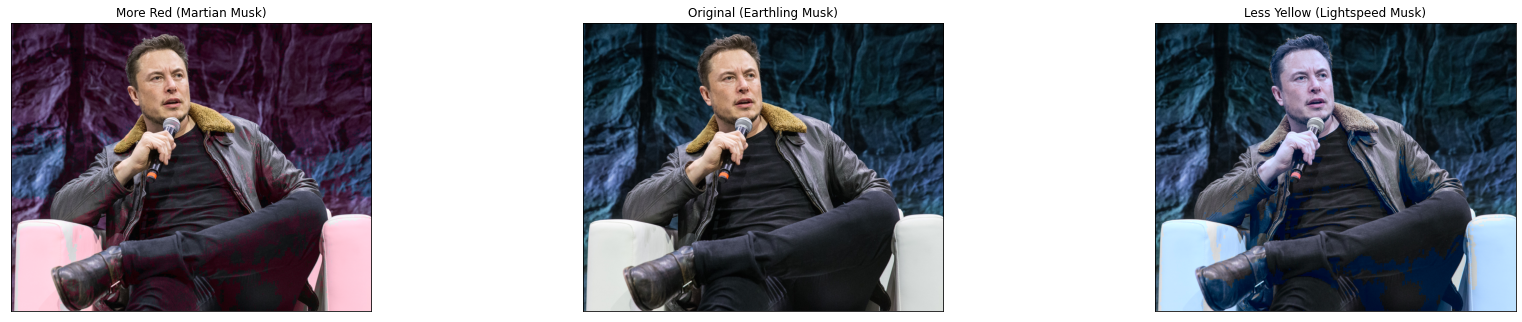

In [26]:
im5_file = datadir + 'MuskPicture.jpg'
im5_0 = cv2.imread(im5_file)

#Original Image
im5_original = cv2.cvtColor(im5_0,cv2.COLOR_BGR2RGB)
#Modification Zone

#------

#Less Yellow Image
im5_less_yellow = cv2.cvtColor(im5_0, cv2.COLOR_BGR2LAB)
#Modification Zone

#multiply by constant <1 (.8) if greater than halfway in channel freq and then clip
im5_less_yellow[:,:,2] = np.where(im5_less_yellow[:,:,2] > 127.5, im5_less_yellow[:,:,2]*.8,im5_less_yellow[:,:,2])

im5_less_yellow = cv2.cvtColor(im5_less_yellow, cv2.COLOR_LAB2RGB)
im5_less_yellow = np.clip(im5_less_yellow, a_min = 0, a_max = 255)
#------

#More Red Image
#multiply by constant  >1 (1.2) and then clip np.clip 
im5_more_red = cv2.cvtColor(im5_0, cv2.COLOR_BGR2LAB)
#im5_more_red[im5_more_red[:,:,1] > 125]*= 1.2


#Modification Zone
im5_more_red[:,:,1] = np.where(im5_more_red[:,:,1] < 127.5, im5_more_red[:,:,1]*1.2,im5_more_red[:,:,1])


im5_more_red = cv2.cvtColor(im5_more_red, cv2.COLOR_LAB2RGB)
im5_less_yellow = np.clip(im5_less_yellow, a_min = 0, a_max = 255)

#-----
fig, axes = plt.subplots(1, 3)
fig.tight_layout(pad=2.0)
fig.set_figheight(25)
fig.set_figwidth(25)

axes[0].set_xticks([]) 
axes[0].set_yticks([])
axes[1].set_xticks([]) 
axes[1].set_yticks([])
axes[2].set_xticks([]) 
axes[2].set_yticks([])

axes[0].imshow(im5_more_red)
axes[0].set_title('More Red (Martian Musk)')#, axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im5_original)
axes[1].set_title('Original (Earthling Musk)')#, axes[0].set_xticks([]), axes[0].set_yticks([])
axes[2].imshow(im5_less_yellow)
axes[2].set_title('Less Yellow (Lightspeed Musk)')#, axes[0].set_xticks([]), axes[0].set_yticks([])

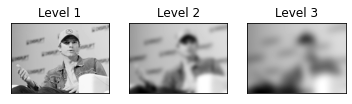

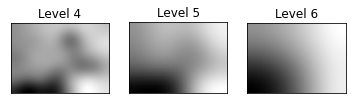

In [27]:
#Gaussian / Laplacian Pyramids
sigma = 20
def blur(im1,sigma):
    ksize1 = np.int(np.ceil(sigma)*6+1)
    fil = cv2.getGaussianKernel(ksize1, sigma) # 1D kernel
    fil = fil*np.transpose(fil) # 2D kernel by outer product
    im1 = cv2.filter2D(im1, -1, fil)
    #imgplot = plt.imshow(im1)
    #plt.show(im1)
    #im1
    return (im1)

def subsamp(im):
    im = cv2.resize(im, (0,0), fx=0.5,fy=0.5)
    return (im)

def sampleImage(im,sigma):
    new_im = blur(im,sigma)
    new_im = subsamp(new_im)
    return(new_im)
    
im1_file = datadir + 'KutcherPicture.jpg'
im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)

im1_level1 = sampleImage(im1,sigma)
im1_level2 = sampleImage(im1_level1, sigma)
im1_level3 = sampleImage(im1_level2, sigma)
im1_level4 = sampleImage(im1_level3, sigma)
im1_level5 = sampleImage(im1_level4, sigma)
Im1_level6 = sampleImage(im1_level5, sigma)

#fig, axes = plt.subplots(1, 6)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Level 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im1_level1,cmap='gray')
axes[1].set_title('Level 2'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(im1_level2,cmap='gray')
axes[2].set_title('Level 3'), axes[2].set_xticks([]), axes[2].set_yticks([])

fig, axes = plt.subplots(1, 3)
axes[0].imshow(im1_level3,cmap='gray')
axes[0].set_title('Level 4'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im1_level4,cmap='gray')
axes[1].set_title('Level 5'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(im1_level5,cmap='gray')
axes[2].set_title('Level 6'), axes[2].set_xticks([]), axes[2].set_yticks([]);